# OLYMPIC DATASET
Dataset

NOC: https://drive.google.com/file/d/1_zGhADzXEA9mFHvuCvpllXMCN2DUE2tH/view?usp=sharing

Athlete: https://drive.google.com/file/d/1y6e0eNKfyo9ILqQHszcrRuv3uQhIMm_z/view?usp=sharing

In [2]:
# we need pandas for datamanupilation and cleaning
import pandas as pd

# we need numpy for acsessing array in dataset
import numpy as np

# we need re (regex) in case of data cleaning
import re 

# we need matplotlib , tablely and seaborn  for data vizualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pl

* download the dataset store it in your local
* use the file path to get the data in as a dataframe

In [3]:
# creating a dataframe using read_csv
ath = pd.read_csv(r"C:\Users\shoba\Desktop\data_science\olympic_dataset\athlete_events.csv")
noc = pd.read_csv(r'C:\Users\shoba\Desktop\data_science\olympic_dataset\noc_regions.csv')

In [4]:
ath

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
noc

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


* we can see that the noc df has less column 
* so we can start the datacleaning from the nac df

In [6]:
noc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


* noc df has 3 columns and 230 rows
* NOC column contains no null value
    * still we have too see any irrelevent data present's in that
* region column contains sum null value 
    * so we can use manupulation method's to rectify the nan value
* notes column has some values only and more null value
    * we cannot use manupulation as there are more null values
    * and it's seem's that we don't have relatable data in that 
    * so we can drop the entire notes column and it will not affect the data

In [7]:
noc.NOC.unique()

array(['AFG', 'AHO', 'ALB', 'ALG', 'AND', 'ANG', 'ANT', 'ANZ', 'ARG',
       'ARM', 'ARU', 'ASA', 'AUS', 'AUT', 'AZE', 'BAH', 'BAN', 'BAR',
       'BDI', 'BEL', 'BEN', 'BER', 'BHU', 'BIH', 'BIZ', 'BLR', 'BOH',
       'BOL', 'BOT', 'BRA', 'BRN', 'BRU', 'BUL', 'BUR', 'CAF', 'CAM',
       'CAN', 'CAY', 'CGO', 'CHA', 'CHI', 'CHN', 'CIV', 'CMR', 'COD',
       'COK', 'COL', 'COM', 'CPV', 'CRC', 'CRO', 'CRT', 'CUB', 'CYP',
       'CZE', 'DEN', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'ERI', 'ESA',
       'ESP', 'EST', 'ETH', 'EUN', 'FIJ', 'FIN', 'FRA', 'FRG', 'FSM',
       'GAB', 'GAM', 'GBR', 'GBS', 'GDR', 'GEO', 'GEQ', 'GER', 'GHA',
       'GRE', 'GRN', 'GUA', 'GUI', 'GUM', 'GUY', 'HAI', 'HKG', 'HON',
       'HUN', 'INA', 'IND', 'IOA', 'IRI', 'IRL', 'IRQ', 'ISL', 'ISR',
       'ISV', 'ITA', 'IVB', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ',
       'KIR', 'KOR', 'KOS', 'KSA', 'KUW', 'LAO', 'LAT', 'LBA', 'LBR',
       'LCA', 'LES', 'LIB', 'LIE', 'LTU', 'LUX', 'MAD', 'MAL', 'MAR',
       'MAS', 'MAW',

* we can conclude that there is no null as well as no irrelevent data 
* we can find that it contains country code

In [8]:
noc.region.isna().sum()

3

In [9]:
noc.region.value_counts()

Germany           4
Yemen             3
Czech Republic    3
Serbia            3
Russia            3
                 ..
Ghana             1
Grenada           1
Guatemala         1
Guinea            1
Zambia            1
Name: region, Length: 206, dtype: int64

In [10]:
noc[noc.region.isna()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


* we can see that 
    * ROT means refugee olympic team
    * TUV means tuvalu
    * UNK means unknown
* instead of having null value we can have the notes information over there 

In [11]:
noc['region'][168] = noc['notes'][168]
noc['region'][208] = noc['notes'][208]
noc['region'][213] = noc['notes'][213]

In [12]:
noc.region.isna().sum()

0

* so we have cleared the null values in the region column

In [13]:
noc.notes.isnull().sum()

209

* we can see here out of 230 datapoint 209 have null values so we are droping the notes column

In [14]:
# droping the notes column
noc.drop("notes", axis=1, inplace=True)

In [15]:
noc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  230 non-null    object
dtypes: object(2)
memory usage: 3.7+ KB


In [16]:
noc.duplicated().sum()

0

* we can see that the dataframe is clean and neat.
* and there are no duplicated value over there

In [17]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


* we can see that the ath dataframe contain's 15 columns and 271116 datpoints 
    * column's -> ID, Name, Gender, Team, NOC, Games, Year, Season, City, Sport, Event
        * these columns have no null values 
        * we still have to look for inapropriate values and duplicate values in these column's
        * and we can see that NOC column presents in both data set 
        * we combine the both dataset using the NOC values
    * column's -> Age, Height, Weight, medal
        * these columns contains null values
        * we have to use data manupulation to get rid of null value
        * we can drop the column if the data is not needed 

In [18]:
ath.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [19]:
ath.ID

0              1
1              2
2              3
3              4
4              5
           ...  
271111    135569
271112    135570
271113    135570
271114    135571
271115    135571
Name: ID, Length: 271116, dtype: int64

* this column contains the index of each person 
* we can see that the number 135570 is repeated its because the same person participated in the different games
* we don't need this data that much
* and it not contain's any null value

In [20]:
ath.Name.value_counts()

Robert Tait McKenzie            58
Heikki Ilmari Savolainen        39
Joseph "Josy" Stoffel           38
Ioannis Theofilakis             36
Takashi Ono                     33
                                ..
Tatyana Vasilyevna Kalmykova     1
Mariya Lvovna Kalmykova          1
Christine Kalmer                 1
Joannis "Jannis" Kalmazidis      1
Pierre-Georges LeClercq          1
Name: Name, Length: 134732, dtype: int64

* we can see that mckenzie has occured 58 times 

In [21]:
ath[ath.Name.duplicated()]

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN


* we can say that the duplicated values have different kind of data for different columns

In [22]:
ath.Gender.value_counts()

M    196594
F     74522
Name: Gender, dtype: int64

* we can see that this column has only 2 values m -male, f - female
    * instead of having m and f as value's we can convert that to 0 and 1 respectively
    * this column has have no null value and also has no in appropriate values

In [23]:
# converting the m and f into 0 and 1 
ath.Gender.replace(['M','F'], [0,1], inplace=True)

In [24]:
ath.Gender.value_counts()

0    196594
1     74522
Name: Gender, dtype: int64

* we have converted the values of the m and f to 0 and 1 so that we can use this data for analysis

In [25]:
ath.Age.isnull().sum()

9474

In [26]:
ath.Age.describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

* we have mean = 25
* we have median  = 24
* we can choose either one of them to fill the nan value

In [27]:
ath[ath.Age.isnull()]

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
147,54,Mohamed Jamshid Abadi,0,NaN,NaN,NaN,Iran,IRI,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN
152,58,Georgi Abadzhiev,0,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Individual",NaN
153,58,Georgi Abadzhiev,0,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Team",NaN
162,66,Mohamed Abakkar,0,NaN,156.0,48.0,Sudan,SUD,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Flyweight,NaN
212,102,Sayed Fahmy Abaza,0,NaN,NaN,NaN,Egypt,EGY,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270679,135368,Antonio A. Zucchi,0,NaN,NaN,NaN,Argentina,ARG,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,NaN
270774,135416,Star Zulu,0,NaN,NaN,NaN,Zambia,ZAM,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Bantamweight,NaN
270793,135426,Max Zumstein,0,NaN,NaN,NaN,Switzerland,SUI,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,NaN
270804,135434,Edmundo Ziga Erraz,0,NaN,180.0,95.0,Chile,CHI,1948 Summer,1948,Summer,London,Athletics,Athletics Men's Hammer Throw,NaN


* we have 9475 null values in the age column 
* and we are going to fill the null value with the mean of age column mean value  = 25
* the dtype of the age column is float and we have convert that into a int

In [28]:
# replacing nan values with the mean 
ath.Age.fillna(ath.Age.mean(),inplace=True) 

In [29]:
ath.Age.isna().sum()

0

* we have filled the nan values with mean.

In [30]:
ath.Age.dtype

dtype('float64')

* we can see that dtype is float 
* we have convert it into a int

In [31]:
ath['Age'] = ath['Age'].astype(np.int64)

In [32]:
ath.Age.dtype

dtype('int64')

* we have converted the dtype to the int64

In [33]:
ath.Height

0         180.0
1         170.0
2           NaN
3           NaN
4         185.0
          ...  
271111    179.0
271112    176.0
271113    176.0
271114    185.0
271115    185.0
Name: Height, Length: 271116, dtype: float64

In [34]:
ath.Height.describe()

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

In [35]:
ath.Height.isnull().sum()

60171

* we have 60171 null values in the height column
* we have to fill the null values with the mean (mean =  175)
* we have to change dtype to int

In [36]:
# filling the height column with the mean value
ath.Height.fillna(ath.Height.mean(),inplace=True) 

In [37]:
ath.Height.isnull().sum()

0

In [38]:
ath['Height'] = ath['Height'].astype(np.int64)

* filled null values with the mean
* and converted the dtype to int

In [39]:
ath.Weight.isna().sum()

62875

In [40]:
ath.Weight.describe()

count    208241.000000
mean         70.702393
std          14.348020
min          25.000000
25%          60.000000
50%          70.000000
75%          79.000000
max         214.000000
Name: Weight, dtype: float64

* in the weight column we have 62875 null values
* and we can use the mean here as well to fill the nan
* we have to convert the dtype to int 

In [41]:
# fill nan with the mean 
ath.Weight.fillna(ath.Weight.mean(), inplace=True)

In [42]:
# converting the dtype to int
ath['Weight'] = ath['Weight'].astype(np.int64)

In [43]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      271116 non-null  int64 
 1   Name    271116 non-null  object
 2   Gender  271116 non-null  int64 
 3   Age     271116 non-null  int64 
 4   Height  271116 non-null  int64 
 5   Weight  271116 non-null  int64 
 6   Team    271116 non-null  object
 7   NOC     271116 non-null  object
 8   Games   271116 non-null  object
 9   Year    271116 non-null  int64 
 10  Season  271116 non-null  object
 11  City    271116 non-null  object
 12  Sport   271116 non-null  object
 13  Event   271116 non-null  object
 14  Medal   39783 non-null   object
dtypes: int64(6), object(9)
memory usage: 31.0+ MB


* we have filled the nan value and converted the dtype to int

In [44]:
ath.Team

0                  China
1                  China
2                Denmark
3         Denmark/Sweden
4            Netherlands
               ...      
271111          Poland-1
271112            Poland
271113            Poland
271114            Poland
271115            Poland
Name: Team, Length: 271116, dtype: object

In [45]:
ath.Team.value_counts()

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Briar                1
Hannover             1
Nan-2                1
Brentina             1
Digby                1
Name: Team, Length: 1184, dtype: int64

In [46]:
ath.Team.isna().sum()

0

In [47]:
ath.Team.nunique()

1184

In [48]:
ath.Team.unique()

array(['China', 'Denmark', 'Denmark/Sweden', ..., 'Solos Carex',
       'Dow Jones', 'Digby'], dtype=object)

* column Team contains no null values
* it contains about 1184 unique values 

In [49]:
ath.NOC.unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

In [50]:
ath.NOC.nunique()

230

* we can clearly see that the NOC column reacts as a bridge between the two dataframe 
* we can use this column to merge the region column in the ath dataframe 
* after there is no use of this column so we can drop this one

In [51]:
# merging the region column as the 
region = ath['NOC'].map(noc.set_index('NOC')['region']) # creating a variable containing the region data as per the noc in the ath dataframe
ath.insert(7, 'region', region) # creating a new column in the dataframe at the 7th position as "region"

In [52]:
# dropping the NOC column 
ath.drop("NOC",axis=1,inplace=True)

In [53]:
ath.head(10)

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,0,24,180,80,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,0,23,170,60,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,0,24,175,70,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,0,34,175,70,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,1,21,185,82,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,1,21,185,82,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,1,25,185,82,Netherlands,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,1,25,185,82,Netherlands,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,1,27,185,82,Netherlands,Netherlands,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,1,27,185,82,Netherlands,Netherlands,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


* we can see here that the games column the same data in the column (year and season)
* so we can drop the column 

In [54]:
# droping the Games column from the dataframe
ath.drop("Games", axis=1, inplace=True)

In [55]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      271116 non-null  int64 
 1   Name    271116 non-null  object
 2   Gender  271116 non-null  int64 
 3   Age     271116 non-null  int64 
 4   Height  271116 non-null  int64 
 5   Weight  271116 non-null  int64 
 6   Team    271116 non-null  object
 7   region  270767 non-null  object
 8   Year    271116 non-null  int64 
 9   Season  271116 non-null  object
 10  City    271116 non-null  object
 11  Sport   271116 non-null  object
 12  Event   271116 non-null  object
 13  Medal   39783 non-null   object
dtypes: int64(6), object(8)
memory usage: 29.0+ MB


In [56]:
ath.region.value_counts()

USA            18853
Germany        15883
France         12758
UK             12256
Russia         11692
               ...  
Timor-Leste        9
Kosovo             8
Tuvalu             7
South Sudan        3
Unknown            2
Name: region, Length: 208, dtype: int64

In [57]:
ath.region.isnull().sum()

349

In [58]:
ath[ath.region.isnull()]

,ID,Name,Gender,Age,Height,Weight,Team,region,Year,Season,City,Sport,Event,Medal
578,332,Zarinah Abdullah,1,21,175,70,Singapore,NaN,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN
579,332,Zarinah Abdullah,1,25,175,70,Singapore,NaN,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,1,28,173,68,Singapore,NaN,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN
7659,4264,Ang Peng Siong,0,21,180,75,Singapore,NaN,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN
7660,4264,Ang Peng Siong,0,21,180,75,Singapore,NaN,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268752,134454,Zhang Guirong,1,26,182,95,Singapore,NaN,2004,Summer,Athina,Athletics,Athletics Women's Shot Put,NaN
268753,134454,Zhang Guirong,1,30,182,95,Singapore,NaN,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,NaN
268993,134587,Zhang Xueling,1,21,163,53,Singapore,NaN,2004,Summer,Athina,Table Tennis,Table Tennis Women's Singles,NaN
268994,134587,Zhang Xueling,1,21,163,53,Singapore-1,NaN,2004,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,NaN


* its seems only the singapore part got null values 
* its the colum merged from the NOC dataframe 
* we would check if there is singupore in it 

In [59]:
noc[noc.region == "Singapore"]

,NOC,region
178,SIN,Singapore


* we can see that the NOC code for singapore is diiferent in the ath data frame 
* so we can simply replace the nan with singapore 

In [60]:
ath.region.fillna("Singapore", inplace=True)

* this column has 349 null values

In [61]:
ath.head(2)

,ID,Name,Gender,Age,Height,Weight,Team,region,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,0,24,180,80,China,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,0,23,170,60,China,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [62]:
ath.Year.nunique()

35

In [63]:
ath.Year.value_counts()

1992    16413
1988    14676
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
2012    12920
1972    11959
1984    11588
1976    10502
1968    10479
1964     9480
1952     9358
1960     9235
1980     8937
1948     7480
1936     7401
1956     6434
1924     5693
1928     5574
2014     4891
2010     4402
2006     4382
1920     4292
2002     4109
1912     4040
1998     3605
1932     3321
1994     3160
1908     3101
1900     1936
1906     1733
1904     1301
1896      380
Name: Year, dtype: int64

In [64]:
ath.Year.isnull().sum()

0

* there is no null values in this column 
* and the dtype is int  

In [65]:
ath.Season.isnull().sum()

0

In [66]:
ath.Season.nunique()

2

In [67]:
ath.Season.unique()

array(['Summer', 'Winter'], dtype=object)

* instead of having summer and winter we can have o and 1
* replace o and 1 for summer and winter respectively so that we do analysis on it 

In [68]:
# replacing summer with 0 and winter with 1
ath.Season.replace(["Summer", 'Winter'], [0, 1], inplace=True)

In [69]:
ath.Season.value_counts()

0    222552
1     48564
Name: Season, dtype: int64

In [70]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      271116 non-null  int64 
 1   Name    271116 non-null  object
 2   Gender  271116 non-null  int64 
 3   Age     271116 non-null  int64 
 4   Height  271116 non-null  int64 
 5   Weight  271116 non-null  int64 
 6   Team    271116 non-null  object
 7   region  271116 non-null  object
 8   Year    271116 non-null  int64 
 9   Season  271116 non-null  int64 
 10  City    271116 non-null  object
 11  Sport   271116 non-null  object
 12  Event   271116 non-null  object
 13  Medal   39783 non-null   object
dtypes: int64(7), object(7)
memory usage: 29.0+ MB


In [71]:
ath.City.nunique()

42

In [72]:
ath.City.value_counts()

London                    22426
Athina                    15556
Sydney                    13821
Atlanta                   13780
Rio de Janeiro            13688
Beijing                   13602
Barcelona                 12977
Los Angeles               12423
Seoul                     12037
Munich                    10304
Montreal                   8641
Mexico City                8588
Helsinki                   8270
Roma                       8119
Tokyo                      7702
Moskva                     7191
Paris                      7169
Berlin                     6506
Amsterdam                  4992
Sochi                      4891
Melbourne                  4829
Vancouver                  4402
Torino                     4382
Stockholm                  4338
Antwerpen                  4292
Salt Lake City             4109
Innsbruck                  3639
Nagano                     3605
Albertville                3436
Lillehammer                3160
Calgary                    2639
Sarajevo

In [73]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,region,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,0,24,180,80,China,China,1992,0,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,0,23,170,60,China,China,2012,0,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,0,24,175,70,Denmark,Denmark,1920,0,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,0,34,175,70,Denmark/Sweden,Denmark,1900,0,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,1,21,185,82,Netherlands,Netherlands,1988,1,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [74]:
ath.Sport.nunique()

66

In [75]:
ath.Sport.value_counts()

Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64

In [76]:
ath.Event.nunique()

765

In [77]:
ath.head(2)

,ID,Name,Gender,Age,Height,Weight,Team,region,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,0,24,180,80,China,China,1992,0,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,0,23,170,60,China,China,2012,0,London,Judo,Judo Men's Extra-Lightweight,NaN


* we only wanted the event but it has an extra data which we have that on sport column
* we are replacing the event data without the sport name before

In [78]:
for i,j in zip(range(len(ath.Event)), ath.Sport):
    ath.Event[i] = re.sub(f"{j}\s",'',ath.Event[i])

C:\Users\shoba\AppData\Local\Temp/ipykernel_11220/3760532301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath.Event[i] = re.sub(f"{j}\s",'',ath.Event[i])


In [79]:
ath.head(2)

,ID,Name,Gender,Age,Height,Weight,Team,region,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,0,24,180,80,China,China,1992,0,Barcelona,Basketball,Men's Basketball,NaN
1,2,A Lamusi,0,23,170,60,China,China,2012,0,London,Judo,Men's Extra-Lightweight,NaN


In [80]:
ath.Medal.isnull().sum()

231333

In [81]:
ath.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

* we can say that the nan values are non winning players
* instead of having gold, bronze and silver 
* we can use 0,1,2,3 for nan,bronze ,silver,gold respectively

In [82]:
# replacing the nan value with the 0
ath.Medal.fillna(0, inplace=True)

In [83]:
ath.Medal.value_counts()

0         231333
Gold       13372
Bronze     13295
Silver     13116
Name: Medal, dtype: int64

In [84]:
# replacing the gold silver bronce value
ath.Medal.replace(['Bronze', 'Silver', 'Gold'], [1, 2, 3], inplace=True)

In [85]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,region,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,0,24,180,80,China,China,1992,0,Barcelona,Basketball,Men's Basketball,0
1,2,A Lamusi,0,23,170,60,China,China,2012,0,London,Judo,Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,0,24,175,70,Denmark,Denmark,1920,0,Antwerpen,Football,Men's Football,0
3,4,Edgar Lindenau Aabye,0,34,175,70,Denmark/Sweden,Denmark,1900,0,Paris,Tug-Of-War,Men's Tug-Of-War,3
4,5,Christine Jacoba Aaftink,1,21,185,82,Netherlands,Netherlands,1988,1,Calgary,Speed Skating,Women's 500 metres,0


In [86]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      271116 non-null  int64 
 1   Name    271116 non-null  object
 2   Gender  271116 non-null  int64 
 3   Age     271116 non-null  int64 
 4   Height  271116 non-null  int64 
 5   Weight  271116 non-null  int64 
 6   Team    271116 non-null  object
 7   region  271116 non-null  object
 8   Year    271116 non-null  int64 
 9   Season  271116 non-null  int64 
 10  City    271116 non-null  object
 11  Sport   271116 non-null  object
 12  Event   271116 non-null  object
 13  Medal   271116 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 29.0+ MB


* more cleaner data than before
* if needed we can even change the rest of the obj value to int so that we can even do analysis with that too

In [88]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,region,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,0,24,180,80,China,China,1992,0,Barcelona,Basketball,Men's Basketball,0
1,2,A Lamusi,0,23,170,60,China,China,2012,0,London,Judo,Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,0,24,175,70,Denmark,Denmark,1920,0,Antwerpen,Football,Men's Football,0
3,4,Edgar Lindenau Aabye,0,34,175,70,Denmark/Sweden,Denmark,1900,0,Paris,Tug-Of-War,Men's Tug-Of-War,3
4,5,Christine Jacoba Aaftink,1,21,185,82,Netherlands,Netherlands,1988,1,Calgary,Speed Skating,Women's 500 metres,0


* with this data we can predict which country will get more medals in future
* for that we need to change the team column to have a int value

In [91]:
ath.Team.nunique()

1184

In [93]:
ath[['Team']]

,Team
0,China
1,China
2,Denmark
3,Denmark/Sweden
4,Netherlands
...,...
271111,Poland-1
271112,Poland
271113,Poland
271114,Poland


In [94]:
ath.region.nunique()

209

In [95]:
ath[['region']]

,region
0,China
1,China
2,Denmark
3,Denmark
4,Netherlands
...,...
271111,Poland
271112,Poland
271113,Poland
271114,Poland


* we can see here team column has 1184 unique values
* and region contains 209 unique values
* instead replacing 1184 values to numeric we can change the 209 values to numeric
* even the data on the both have same values slight difference only

In [103]:
ath.region.replace(ath.region.unique(),[i for i in range(209)], inplace=True)

In [105]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      271116 non-null  int64 
 1   Name    271116 non-null  object
 2   Gender  271116 non-null  int64 
 3   Age     271116 non-null  int64 
 4   Height  271116 non-null  int64 
 5   Weight  271116 non-null  int64 
 6   Team    271116 non-null  object
 7   region  271116 non-null  int64 
 8   Year    271116 non-null  int64 
 9   Season  271116 non-null  int64 
 10  City    271116 non-null  object
 11  Sport   271116 non-null  object
 12  Event   271116 non-null  object
 13  Medal   271116 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 29.0+ MB


# DATA VISUALISATION

In [87]:
ath.describe()

,ID,Gender,Age,Height,Weight,Year,Season,Medal
count,271116.000000,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000,271116.000000,271116.000000
mean,68248.954396,0.274871,25.537438,175.26374,70.537549,1978.378480,0.179126,0.293760
std,39022.286345,0.446450,6.281690,9.27917,12.577563,29.877632,0.383459,0.774697
min,1.000000,0.000000,10.000000,127.00000,25.000000,1896.000000,0.000000,0.000000
25%,34643.000000,0.000000,22.000000,170.00000,63.000000,1960.000000,0.000000,0.000000
50%,68205.000000,0.000000,25.000000,175.00000,70.000000,1988.000000,0.000000,0.000000
75%,102097.250000,1.000000,28.000000,180.00000,75.000000,2002.000000,0.000000,0.000000
max,135571.000000,1.000000,97.000000,226.00000,214.000000,2016.000000,1.000000,3.000000


In [106]:
ath.corr()

,ID,Gender,Age,Height,Weight,region,Year,Season,Medal
ID,1.000000,0.026945,-0.003472,-0.009631,-0.007691,0.015477,0.011885,0.013716,0.010842
Gender,0.026945,1.000000,-0.176163,-0.447047,-0.464039,-0.010520,0.289882,0.037277,0.006297
Age,-0.003472,-0.176163,1.000000,0.104965,0.158591,-0.030574,-0.103436,-0.037072,0.022689
Height,-0.009631,-0.447047,0.104965,1.000000,0.786724,-0.034727,0.039832,-0.030379,0.074116
Weight,-0.007691,-0.464039,0.158591,0.786724,1.000000,-0.019583,0.027271,0.002907,0.073436
region,0.015477,-0.010520,-0.030574,-0.034727,-0.019583,1.000000,0.100796,0.001823,-0.111156
Year,0.011885,0.289882,-0.103436,0.039832,0.027271,0.100796,1.000000,0.147697,-0.060652
Season,0.013716,0.037277,-0.037072,-0.030379,0.002907,0.001823,0.147697,1.000000,-0.035376
Medal,0.010842,0.006297,0.022689,0.074116,0.073436,-0.111156,-0.060652,-0.035376,1.000000


<AxesSubplot:>

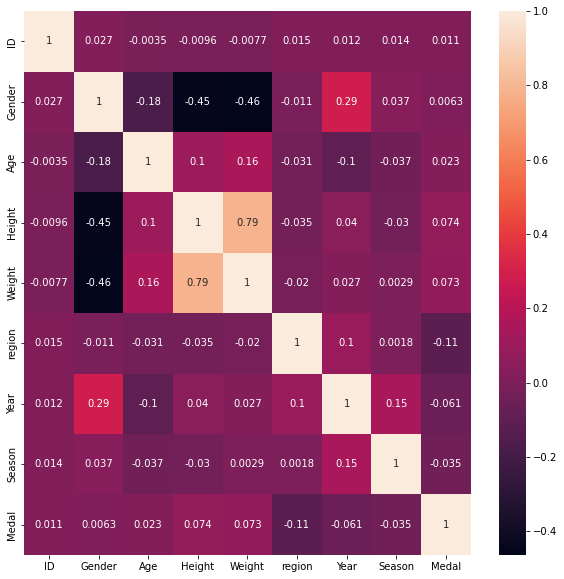

In [108]:
plt.figure(figsize=(10,10))
sns.heatmap(ath.corr(), annot=True)

* we can see here that the correlation of the feature having less relation between them 
    * out of these we can see the maximum corelatio is between the height and weight

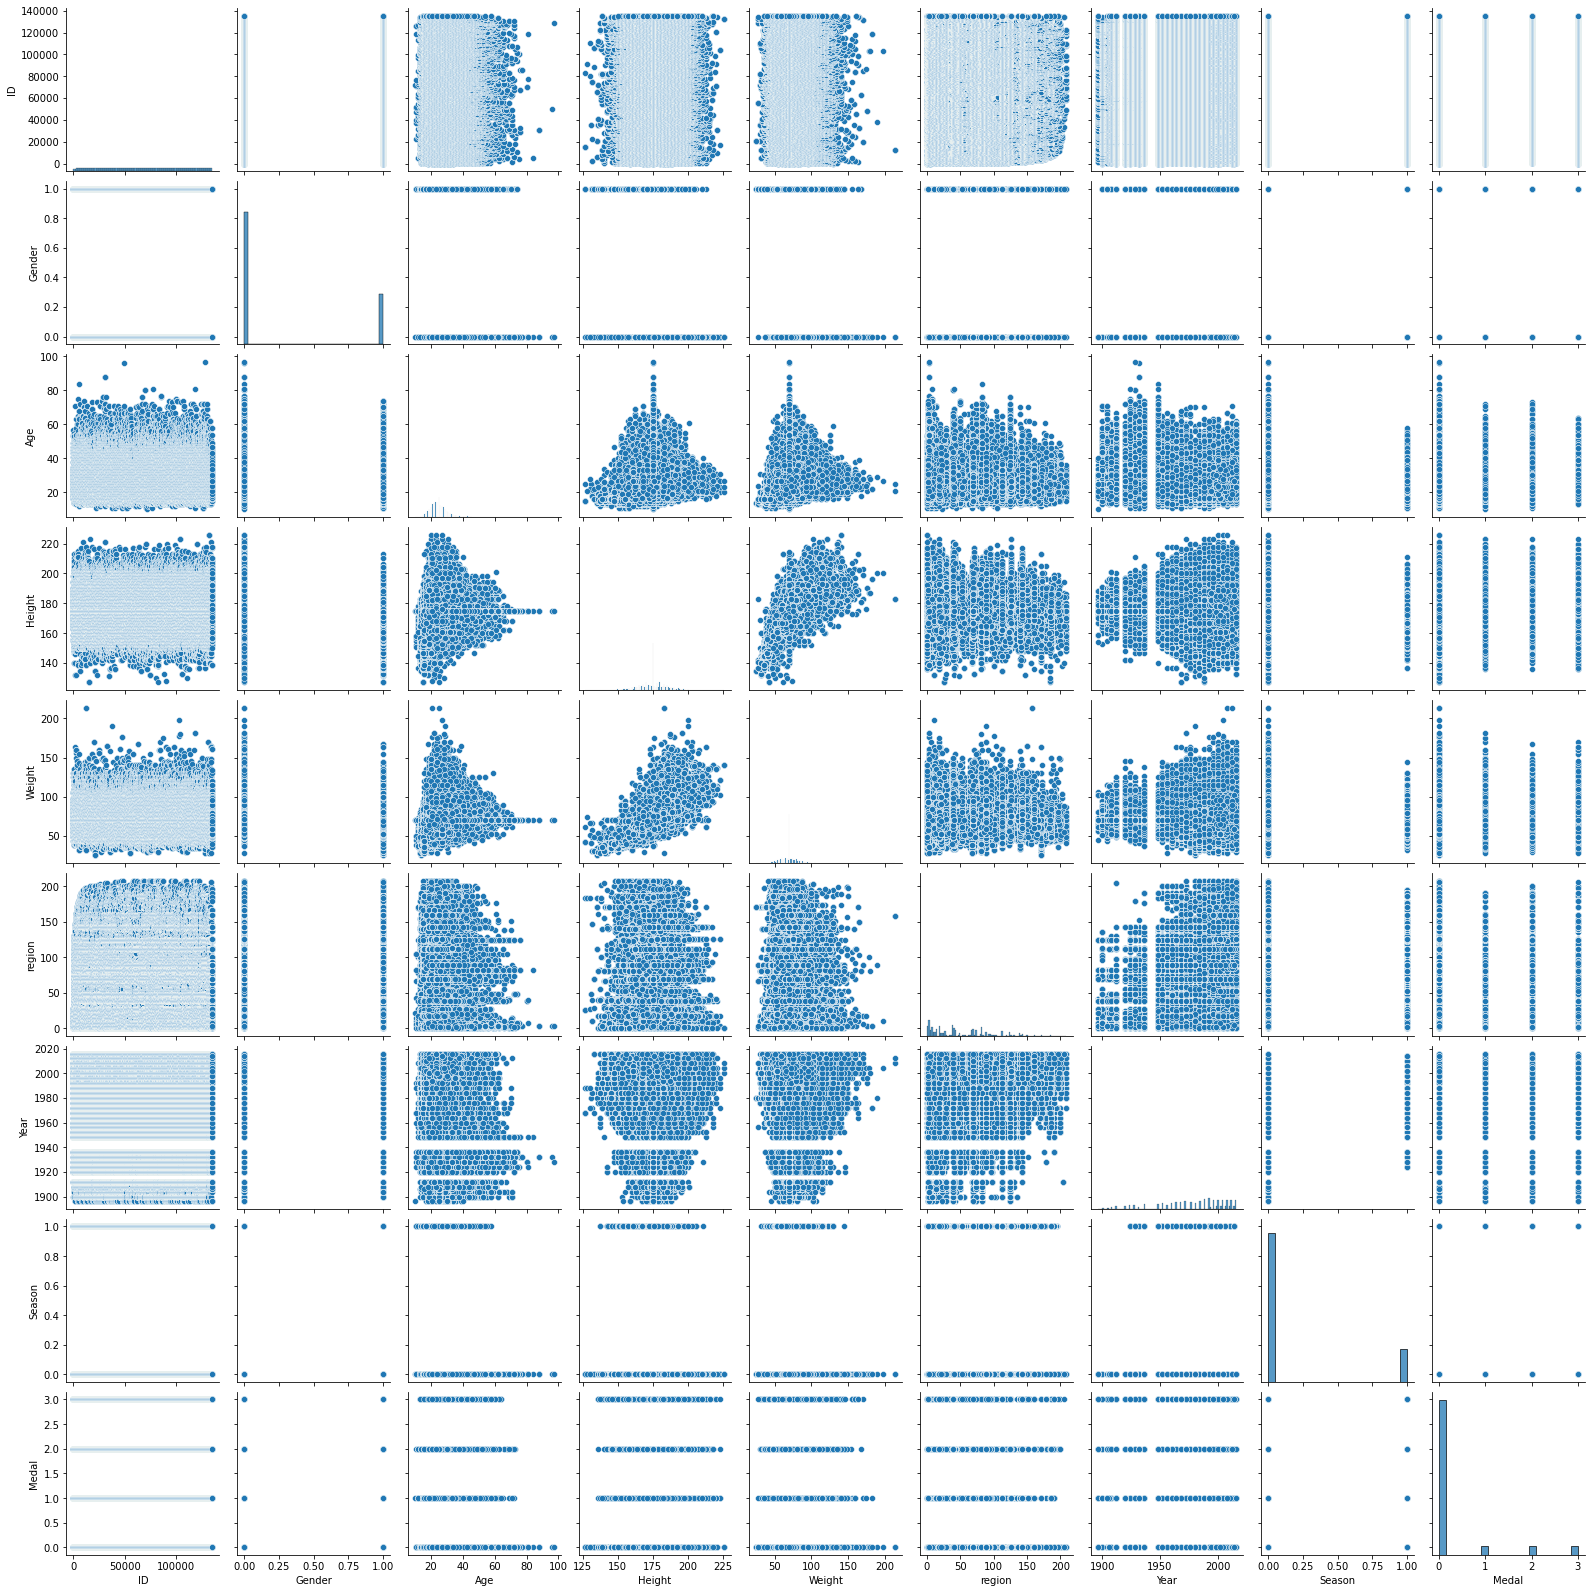

In [112]:
sns.pairplot(ath)